# Test pipeline from IMCprocess

## Create Img_adata object from csv input files
It is noted that csv file should have columns 'X_position' and 'Y_position'. Since csv output from Imacyte do not have X and Y coordinates, we need to add them from histogram csv output

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import os, sys
sys.path.append(os.path.join('..'))

import IMCprocess.img_anndata as ia
from IMCprocess.img_anndata.img_anndata import Img_anndata
from IMCprocess.utils import utils as ut
from IMCprocess.clustifier import clustifier as cl

In [2]:
def add_XY(histocat_csv, Imacyte_csv):
    new_df_ls = []
    for raw, new in zip(histocat_csv, Imacyte_csv):
        raw_df = pd.read_csv(raw)
        new_df = pd.read_csv(new, index_col=0)
        new_df['X_position'] = np.array(raw_df['X_position'])
        new_df['Y_position'] = np.array(raw_df['Y_position'])
        new_df_ls.append(new_df)
    return new_df_ls

In [3]:
histocat_csv = ['../data/20211022_testTMA1_s0_a2_ac.csv', 
                '../data/20211022_testTMA1_s0_a4_ac.csv',
                '../data/20211022_testTMA1_s0_a5_ac.csv',
                ]
Imacyte_csv = ['../data/ROI002_Basal-like_BC_mean_aggregated.csv',
               '../data/ROI004_ERPR+BC_mean_aggregated.csv',
               '../data/ROI005_Her2+BC_mean_aggregated.csv'
               ]
df_ls = add_XY(histocat_csv, Imacyte_csv)

In [4]:
df_ls[0].head()

,Image_id,CD163_,CD31_CD34_,CD3_,CD44_,CD4_,CD68_,CD8_,CK5_6_,Cleaved_caspase3_,...,Vimentin_,YAP1_,aSMA_,pSMAD2_,pSTAT3_,panKeratin_,Mask_id,Unnamed: 31,X_position,Y_position
Cell_id,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.875000,0.000000,0.000000,0.000000,0.000000,0.0,1,NaN,2.428571,2.142857
2,1,0.0,0.0,0.042857,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.157143,0.000000,0.000000,0.000000,0.000000,0.0,1,NaN,145.074081,3.913580
3,1,0.0,0.0,0.000000,0.562500,0.0,0.541667,0.0,0.0,0.0,...,0.979167,0.625000,0.000000,0.145833,0.083333,0.0,1,NaN,182.964279,3.839286
4,1,0.0,0.0,0.000000,0.190476,0.0,0.238095,0.0,0.0,0.0,...,0.428571,0.285714,0.095238,0.238095,0.190476,0.0,1,NaN,188.761902,2.285714
5,1,0.0,0.0,0.045455,0.068182,0.0,0.000000,0.0,0.0,0.0,...,0.318182,0.272727,0.000000,0.022727,0.000000,0.0,1,NaN,209.113205,3.773585


## Create img_anndata objects for specific projects

* The data matrices is created as anndata (https://anndata.readthedocs.io/en/latest/)
* Merge intensity table of all images and save as adata variable inside Img_anndata class
* Observation table: img_id, this img_id is stored as table in adata variable
* Spatial info: X, Y

In [5]:
# input is a list of image dataframes and image ids
Img_proj = Img_anndata(dfs=df_ls, img_ids=['R2', 'R4','R5'])

In [6]:
Img_proj.adata

AnnData object with n_obs × n_vars = 13170 × 28
    obs: 'img_id'
    obsm: 'spatial'

In [7]:
Img_proj.adata.obs

,img_id
0_0,R2
1_0,R2
2_0,R2
3_0,R2
4_0,R2
...,...
4713_2,R5
4714_2,R5
4715_2,R5
4716_2,R5


In [8]:
# Call intensity marker data frame from adata object
Img_proj.adata.to_df()

,CD163_,CD31_CD34_,CD3_,CD44_,CD4_,CD68_,CD8_,CK5_6_,Cleaved_caspase3_,ER_,...,PD1_,PDGFRa_,PDGFRb_,PDL1_,Vimentin_,YAP1_,aSMA_,pSMAD2_,pSTAT3_,panKeratin_
0_0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000
1_0,0.000000,0.0,0.042857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.157143,0.000000,0.000000,0.000000,0.000000,0.000000
2_0,0.000000,0.0,0.000000,0.562500,0.000000,0.541667,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.979167,0.625000,0.000000,0.145833,0.083333,0.000000
3_0,0.000000,0.0,0.000000,0.190476,0.000000,0.238095,0.000000,0.0,0.0,0.0,...,0.285714,0.000000,0.000000,0.0,0.428571,0.285714,0.095238,0.238095,0.190476,0.000000
4_0,0.000000,0.0,0.045455,0.068182,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.068182,0.022727,0.000000,0.0,0.318182,0.272727,0.000000,0.022727,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713_2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4714_2,0.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4715_2,0.298077,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.048077,0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.009615
4716_2,0.000000,0.0,0.511111,0.044444,0.133333,0.000000,0.444444,0.0,0.0,0.0,...,0.000000,0.155556,0.644444,0.0,0.488889,0.377778,0.000000,0.000000,0.000000,0.000000


## Phenograph Clustering level1

In [9]:
Img_proj.adata.var_names

Index(['CD163_', 'CD31_CD34_', 'CD3_', 'CD44_', 'CD4_', 'CD68_', 'CD8_',
       'CK5_6_', 'Cleaved_caspase3_', 'ER_', 'E_Cadherin_', 'FAP_', 'GATA3_',
       'GranzymeB_', 'Her2_', 'Keratin8_18_', 'Ki67_', 'MCAM_', 'PD1_',
       'PDGFRa_', 'PDGFRb_', 'PDL1_', 'Vimentin_', 'YAP1_', 'aSMA_', 'pSMAD2_',
       'pSTAT3_', 'panKeratin_'],
      dtype='object')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10312080383300781 seconds
Jaccard graph constructed in 3.4191830158233643 seconds
Wrote graph to binary file in 0.21650004386901855 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.935886
Louvain completed 21 runs in 3.5110509395599365 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 8.91903281211853 seconds


/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


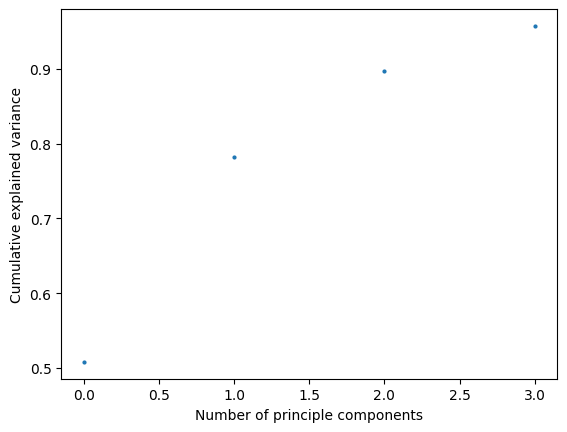

In [10]:
# choose marker for level 1 clustering
markers1 = ['CD31_CD34_','CD3_','Vimentin_','panKeratin_','CD68_']
Img_proj.cluster_phenograph(Img_proj.adata,markers1, name_level = 'level1')

/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'PhenoGraph_clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

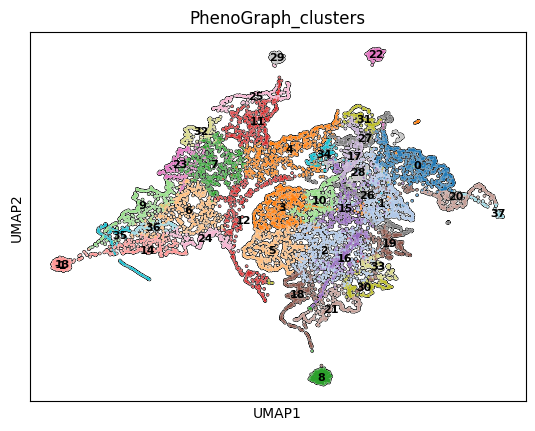

In [11]:
ut.plt_umap(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters')

/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: xlabel='PhenoGraph_clusters'>,
 'dendrogram_ax': <Axes: >}

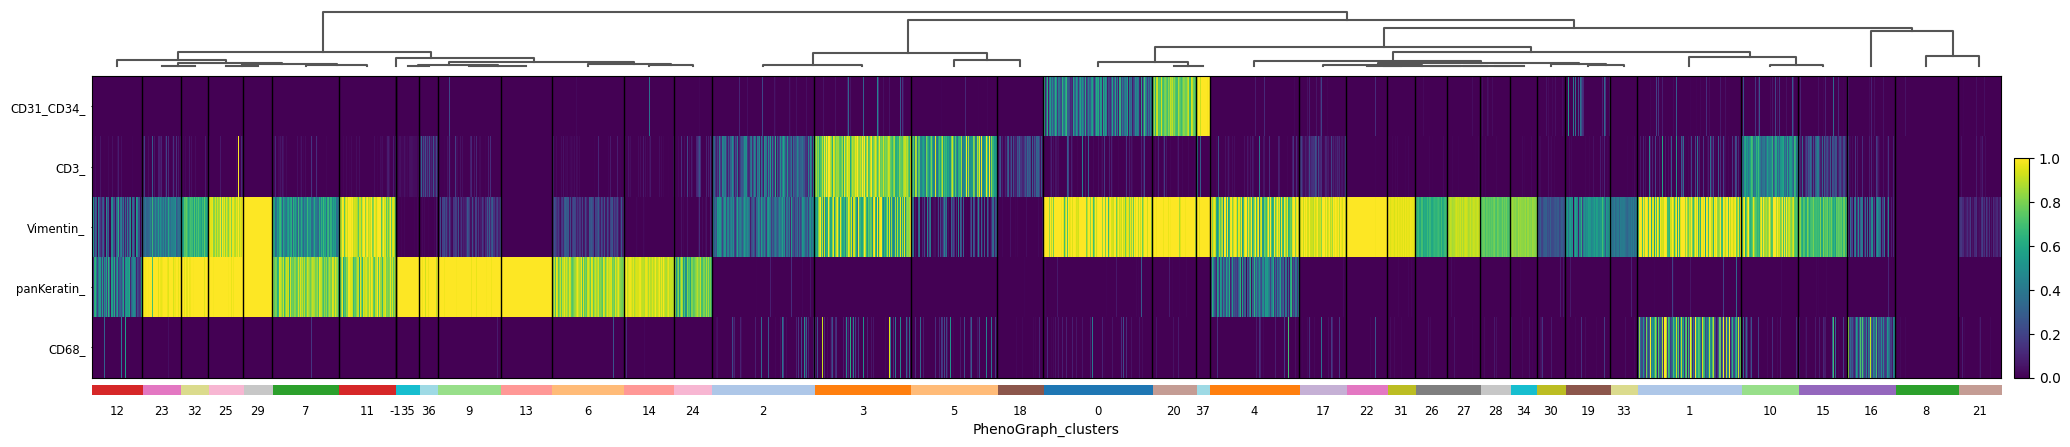

In [12]:
ut.heatmap_dendrogram(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters', (25,5), markers = markers1)

/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: xlabel='PhenoGraph_clusters'>,
 'dendrogram_ax': <Axes: >}

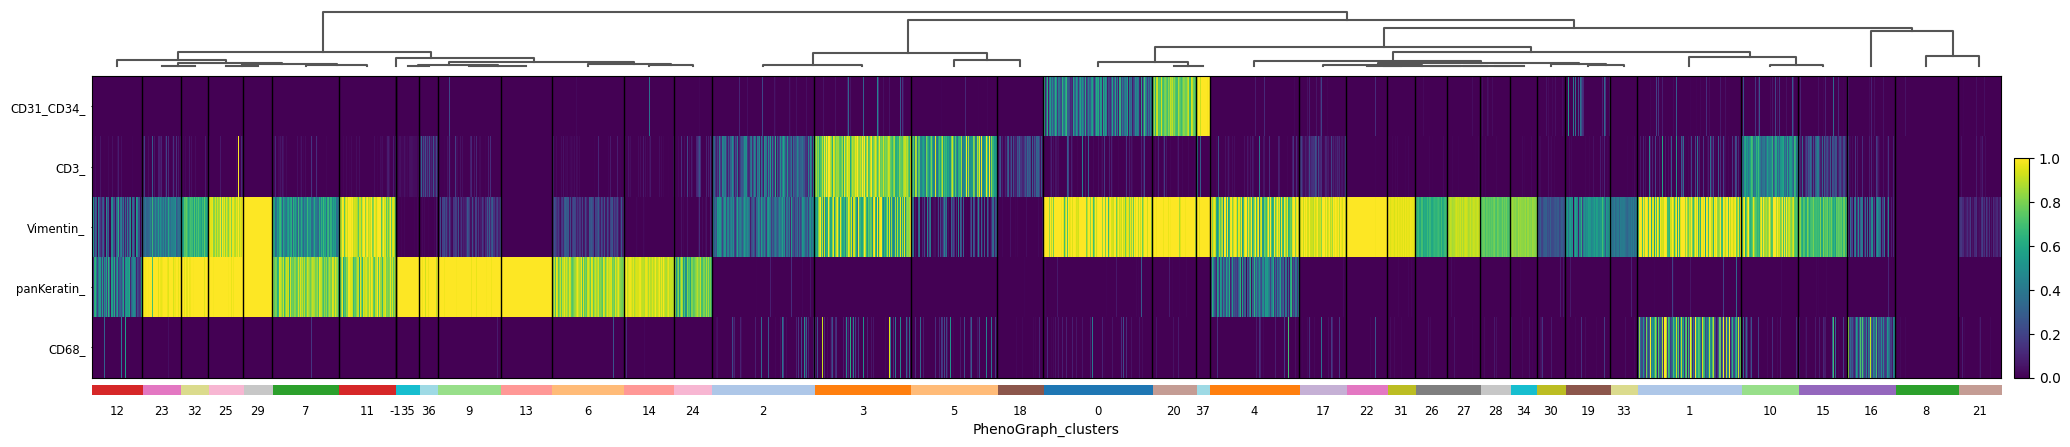

In [13]:
ut.heatmap_dendrogram(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters', (25,5), markers = markers1)

/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


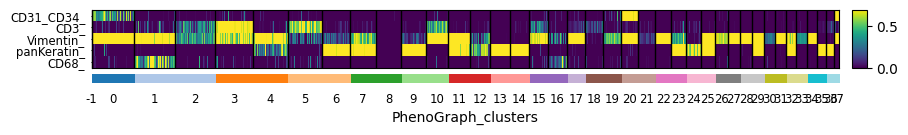

In [29]:
sc.pl.heatmap(Img_proj.adata_dict['level1'],
              groupby='PhenoGraph_clusters', 
              var_names=markers1, vmax=0.7,
              swap_axes=True)